In [3]:
import numpy as np
from network_simulator_v2 import NetworkSimulatorV2

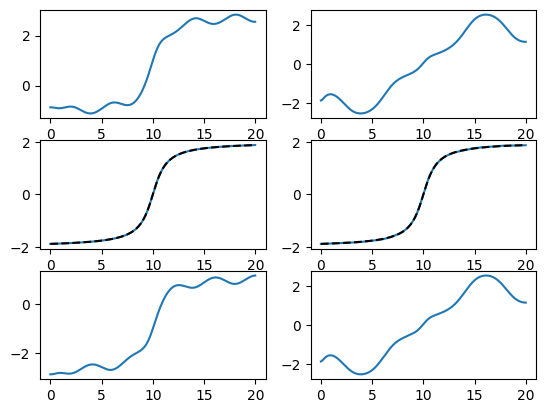

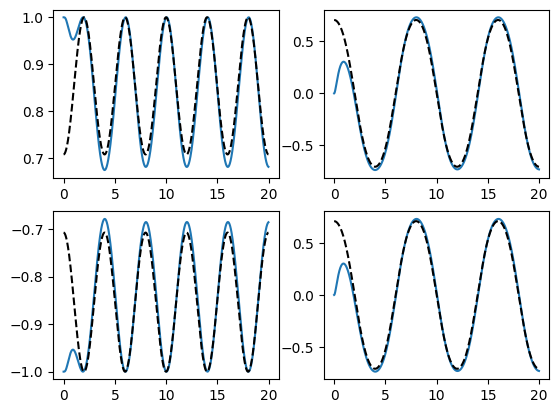

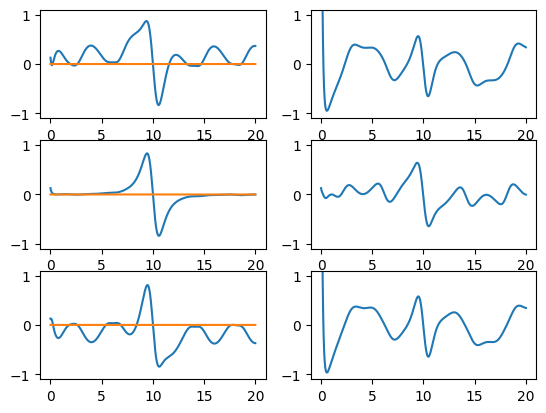

In [20]:
m = [1, 1, 1]
l = [1, 1]
g = 9.81

dt = 0.01
tf = 20

n = 3
k = 2

D_of_G = np.array([[ 1,  0],
                             [-1, -1],
                             [ 0,  1]])

kp = 10
kd = 10

theta_d = lambda t: np.pi/4*np.cos(np.pi/4*t)
theta_d_dot = lambda t: -np.pi**2/16*np.sin(np.pi/4*t)
theta_d_ddot = lambda t: -np.pi**3/64*np.cos(np.pi/4*t)
Qe_d = lambda t: np.array([[l[0]*np.cos(theta_d(t)), l[0]*np.sin(theta_d(t))],
                             [-l[1]*np.cos(theta_d(t)), l[1]*np.sin(theta_d(t))]])
Qe_d_dot = lambda t: np.array([[-l[0]*np.sin(theta_d(t))*theta_d_dot(t), l[0]*np.cos(theta_d(t))*theta_d_dot(t)],
                                 [l[1]*np.sin(theta_d(t))*theta_d_dot(t), l[1]*np.cos(theta_d(t))*theta_d_dot(t)]])
Qe_d_ddot = lambda t: np.array([[-l[0]*np.cos(theta_d(t))*theta_d_dot(t)**2-l[0]*np.sin(theta_d(t))*theta_d_ddot(t), l[0]*np.sin(theta_d(t))*theta_d_dot(t)**2-l[0]*np.cos(theta_d(t))*theta_d_ddot(t)],
                                  [l[1]*np.cos(theta_d(t))*theta_d_dot(t)**2+l[1]*np.sin(theta_d(t))*theta_d_ddot(t), -l[1]*np.sin(theta_d(t))*theta_d_dot(t)**2-l[1]*np.cos(theta_d(t))*theta_d_ddot(t)],])

i_leader = 1
r_leader_d = lambda t: np.array([4/np.pi*np.arctan(t-10), 4/np.pi*np.arctan(t-10)])
r_leader_d_dot = lambda t: np.array([4/np.pi/(1+(t-10)**2), 4/np.pi/(1+(t-10)**2)])
r_leader_d_ddot = lambda t: np.array([-8/np.pi*(t-10)/(1+(t-10)**2)**2, -8/np.pi*(t-10)/(1+(t-10)**2)**2])

Q_0 = np.array([r_leader_d(0)]*n) + np.array([[1, 0], [0, 0], [-1, 0]])
Q_dot_0 = np.array([[0, 0], [0, 0], [0, 0]])

sim = NetworkSimulatorV2(n, k, m, l, g, D_of_G, dt, tf, Q_0, Q_dot_0, i_leader, r_leader_d, r_leader_d_dot, r_leader_d_ddot, Qe_d, Qe_d_dot, Qe_d_ddot, kp, kd)
sim.run()
sim.generate_plots()
sim.generate_animation("2-link_2", ((-3, 3), (-3, 3)))